Popularne instancje QAP wraz z dokladnym minimum funkcji celu
  *  Nug12   12    578 (OPT)    (12,7,9,3,4,8,11,1,5,6,10,2)

 *   Nug14   14   1014 (OPT)    (9,8,13,2,1,11,7,14,3,4,12,5,6,10)

 *   Nug15   15   1150 (OPT)    (1,2,13,8,9,4,3,14,7,11,10,15,6,5,12)

 *   Nug16a  16   1610 (OPT)    (9,14,2,15,16,3,10,12,8,11,6,5,7,1,4,13)

 *   Nug16b  16   1240 (OPT)    (16,12,13,8,4,2,9,11,15,10,7,3,14,6,1,5)

 *   Nug17   17   1732 (OPT)    (16,15,2,14,9,11,8,12,10,3,4,1,7,6,13,17,5)

 *   Nug18   18   1930 (OPT)    (10,3,14,2,18,6,7,12,15,4,5,1,11,8,17,13,9,16)

 *   Nug20   20   2570 (OPT)    (18,14,10,3,9,4,2,12,11,16,19,15,20,8,13,17,5,7,1,6)

 *   Nug21   21   2438 (OPT)    (4,21,3,9,13,2,5,14,18,11,16,10,6,15,20,19,8,7,1,12,17)

 *   Nug22   22   3596 (OPT)    (2,21,9,10,7,3,1,19,8,20,17,5,13,6,12,16,11,22,18,14,15)

 *   Nug24   24   3488 (OPT)    (17,8,11,23,4,20,15,19,22,18,3,14,1,10,7,9,16,21,24,12,6,13,5,2)

 *   Nug25   25   3744 (OPT)    (5,11,20,15,22,2,25,8,9,1,18,16,3,6,19,24,21,14,7,10,17,12,4,23,13)

*  Nug27   27   5234 (OPT)    (23,18,3,1,27,17,5,12,7,15,4,26,8,19,20,2,24,21,14,10,9,13,22,25,6,16,11)

*  Nug28   28   5166 (OPT)    (18,21,9,1,28,20,11,3,13,12,10,19,14,22,15,2,25,16,4,23,7,17,24,26,5,27,8,6)

*  Nug30   30   6124 (OPT)    (5 12 6 13 2 21 26 24 10 9 29 28 17 1 8 7 19 25 23 22 11 16 30 4 15 18 27 3 14 20)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request
from tqdm.notebook import tqdm
import threading

In [2]:
def simulated_annealing(instance_url, T, radius, alpha):
    qap_instance_file = urllib.request.urlopen(instance_url)
    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))

    def qap_objective_function(p):
        s = 0.0
        for i in range(n):
            s += (A[i, :] * B[p[i], p]).sum()
        return s

    def random_neighbor(p, radius):
        q = p.copy()
        for r in range(radius):
            i, j = np.random.choice(n, 2, replace=False)
            q[i], q[j] = q[j], q[i]
        return q

    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p)
    costs = np.zeros(T)
    for t in tqdm(range(T), desc=f"{instance_url}"):
        q = random_neighbor(p, radius)
        q_cost = qap_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    elapsed_time = time.time() - t0
    min_cost = costs.min()

    print(f'Instancja: {instance_url}')
    print(f'Czas: {elapsed_time:.2f} s, Minimalny koszt: {min_cost}')

    return (instance_url, min_cost, costs)

In [3]:
tasks = [
    ('https://qaplib.mgi.polymtl.ca/data.d/nug12.dat', 500000, 1, 0.5),
    ('https://qaplib.mgi.polymtl.ca/data.d/nug15.dat', 1000000, 1, 0.3),
    ('https://qaplib.mgi.polymtl.ca/data.d/nug20.dat', 2000000, 1, 0.2),
    ('https://qaplib.mgi.polymtl.ca/data.d/nug25.dat', 4000000, 1, 0.1),
]

https://qaplib.mgi.polymtl.ca/data.d/nug15.dat:   0%|          | 0/1000000 [00:00<?, ?it/s]

https://qaplib.mgi.polymtl.ca/data.d/nug20.dat:   0%|          | 0/2000000 [00:00<?, ?it/s]

https://qaplib.mgi.polymtl.ca/data.d/nug25.dat:   0%|          | 0/4000000 [00:00<?, ?it/s]

https://qaplib.mgi.polymtl.ca/data.d/nug12.dat:   0%|          | 0/500000 [00:00<?, ?it/s]

Instancja: https://qaplib.mgi.polymtl.ca/data.d/nug12.dat
Czas: 190.82 s, Minimalny koszt: 578.0


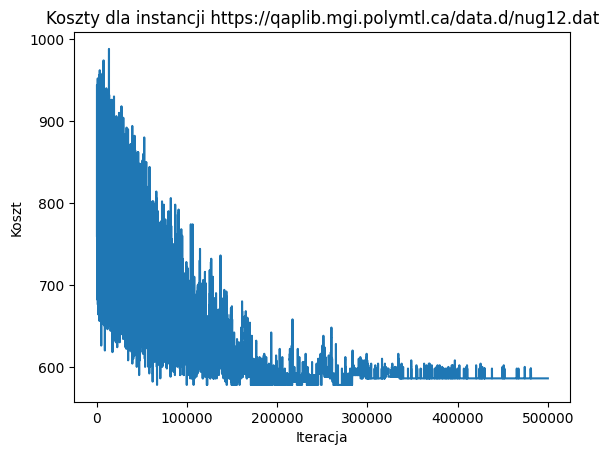

Instancja: https://qaplib.mgi.polymtl.ca/data.d/nug15.dat
Czas: 428.90 s, Minimalny koszt: 1150.0


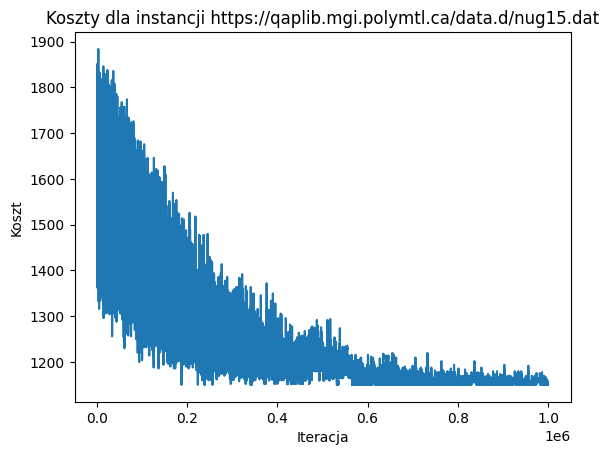

Instancja: https://qaplib.mgi.polymtl.ca/data.d/nug20.dat
Czas: 793.05 s, Minimalny koszt: 2570.0


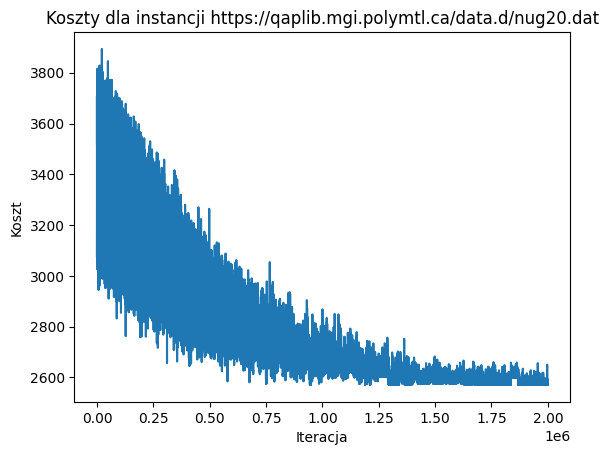

Instancja: https://qaplib.mgi.polymtl.ca/data.d/nug25.dat
Czas: 1096.86 s, Minimalny koszt: 3744.0


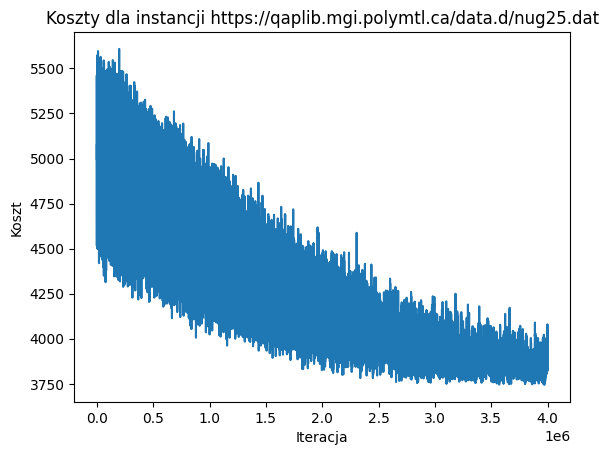

Wszystkie zadania zostały ukończone.


In [4]:
def run_simulated_annealing_with_plot(instance_url, T, radius, alpha):
    instance_url, min_cost, costs = simulated_annealing(instance_url, T, radius, alpha)
    
    plt.figure()
    plt.plot(costs)
    plt.title(f'Koszty dla instancji {instance_url}')
    plt.xlabel('Iteracja')
    plt.ylabel('Koszt')
    plt.show()

threads = []

for instance_url, T, radius, alpha in tasks:
    thread = threading.Thread(target=run_simulated_annealing_with_plot, args=(instance_url, T, radius, alpha))
    
    threads.append(thread)
    
    thread.start()

for thread in threads:
    thread.join()

print("Wszystkie zadania zostały ukończone.")
